Recall (Sensitivity) $ \dfrac{TP}{TP+FN} $ 이 매우 중요다고 판단할 수 있다.


**Precision의 경우**
- False Positive :
    - 무시해도 될 신인인데 굳이 컨텐츠를 생산했다. 
        - 뭐 어때, 에너지 소비하긴 했지만 괜찮.

**Recall의 경우**
- False Negative:
    - 빠르게 컨텐츠를 생산해야 하는 신인인데, 걸러버렸다.
        - 다른 매체에 선수를 뺐길 수 있다. 유저 유입이 적어짐.
        - 다른 부가 한국에서의 공연 에이전시 계약, 머천다이즈 등 부가적인 기회들을 놓쳐버릴 수 있음.
        
     

In [112]:
import pandas as pd
import numpy as np

## Load Data

In [113]:
df = pd.read_csv("../data/df_baseline.csv")

In [114]:
print(df.shape)

(1083, 18)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 18 columns):
label             1083 non-null int64
artist            1083 non-null object
album             1083 non-null object
genre             1083 non-null object
single_count      1083 non-null int64
freq_billboard    1083 non-null int64
freq_genius       1083 non-null int64
freq_theSource    1083 non-null int64
freq_xxl          1083 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1083 non-null int64
instagram         1083 non-null int64
facebook          1083 non-null int64
spotify           1083 non-null int64
soundcloud        1083 non-null int64
youtube           1083 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 152.4+ KB


In [116]:
df.describe()

,label,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,61.000000,324.000000,220.000000,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03
mean,0.209603,2.595568,0.642659,1.395199,13.378578,232.204063,66.098361,71.015432,6.810000,8.162517e+05,1.148277e+06,9.392479e+05,4.052015e+05,2.045023e+05,5.766690e+05
std,0.407213,2.806590,3.372542,24.121972,40.525759,924.497039,16.944719,9.724840,1.360932,3.595182e+06,6.297742e+06,3.392730e+06,1.143469e+06,8.875424e+05,1.908113e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,65.000000,6.100000,3.949000e+03,0.000000e+00,1.013800e+04,7.023000e+03,0.000000e+00,0.000000e+00
50%,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,69.000000,72.500000,7.050000,4.024000e+04,3.099500e+04,7.855900e+04,4.727500e+04,1.736000e+03,1.924800e+04
75%,0.000000,4.000000,0.000000,0.000000,4.000000,65.500000,76.000000,78.000000,7.800000,2.889390e+05,3.010275e+05,4.527645e+05,2.269760e+05,3.220250e+04,2.148705e+05
max,1.000000,37.000000,73.000000,731.000000,200.000000,12802.000000,85.000000,92.000000,9.500000,5.696178e+07,1.366012e+08,6.167920e+07,1.382065e+07,9.710262e+06,2.367711e+07


# Feature Engineering

### Rating

#### 스케일링

In [117]:
df['rating_pitch'] = df['rating_pitch'] * 10

In [118]:
df['rating_pitch'].head()

0     NaN
1     NaN
2     NaN
3    78.0
4     NaN
Name: rating_pitch, dtype: float64

In [119]:
def avg_rating():
    for i in range(len(df)):
        if np.isnan(df.loc[i, 'rating_meta']) == True:
            if np.isnan(df.loc[i, 'rating_pitch']) == True:
                if np.isnan(df.loc[i, 'rating_AOTY']) == True:
                    df.loc[i, 'rating'] = 0
                else:
                    df.loc[i, 'rating'] = df.loc[i, 'rating_AOTY']
            else:
                df.loc[i, 'rating'] = df.loc[i, 'rating_pitch']
        else:
            df.loc[i, 'rating'] = df.loc[i, 'rating_meta']
            
    return df.head()

In [120]:
avg_rating()

,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube,rating
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0,0.0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975,0.0
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764,0.0
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,78.0,91790,59340,209063,141268,283539,0,78.0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0,0.0


## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [121]:
df = pd.get_dummies(df, columns=['genre'])

In [122]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'rating', 'genre_Soul',
       'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

In [123]:
df.head()

,label,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,...,spotify,soundcloud,youtube,rating,genre_Soul,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
0,0,Flash Bang Grenada,10 Haters,0,0,0,0,0,NaN,NaN,...,346,0,0,0.0,0,0,1,0,0,0
1,0,Aggro Santos,AggroSantos.com,3,0,0,0,0,NaN,NaN,...,4675,585,7975,0.0,0,0,1,0,0,0
2,0,AKA,Altar Ego,4,0,0,1,2,NaN,NaN,...,22298,0,3643764,0.0,0,0,1,0,0,0
3,0,Shlohmo,Bad Vibes,0,0,0,0,67,NaN,NaN,...,141268,283539,0,78.0,0,0,1,0,0,0
4,0,Glasses Malone,Beach Cruiser,4,0,0,0,4,NaN,NaN,...,16402,0,0,0.0,0,0,1,0,0,0


#### Split train & test data 

In [124]:
feature_names = ['artist', 'album', 'single_count', 
                 'freq_billboard', 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul',
                 'rating'
                ]
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [125]:
dfX.tail()

,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul,rating
1078,Lo Moon,Lo Moon,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0,73.0
1079,Calum Scott,Only Human,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0,76.0
1080,Angie,Suicidal Since 1995,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0,76.0
1081,Superorganism,Superorganism,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0,73.0
1082,The Academic,Tales from the Backseat,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0,67.0


In [126]:
dfy.tail()

1078    0
1079    0
1080    0
1081    0
1082    0
Name: label, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, y_train, y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=0)

In [141]:
X_train = X_train_0.drop(columns=['artist', 'album'])

In [142]:
X_test = X_test_0.drop(columns=['artist', 'album'])

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
model = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10,
                                min_samples_split=5, min_samples_leaf=5
                                ).fit(X_train, y_train)

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[591,  11],
       [ 33, 123]])

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       602
          1       0.92      0.79      0.85       156

avg / total       0.94      0.94      0.94       758



In [149]:
confusion_matrix(y_test, model.predict(X_test))

array([[241,  13],
       [ 27,  44]])

In [150]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       254
          1       0.77      0.62      0.69        71

avg / total       0.87      0.88      0.87       325



In [151]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

In [152]:
import matplotlib.pyplot as plt

def draw_roc():
   
    plt.figure(figsize=(10, 10))

    plt.plot(fpr, tpr, label="roc curve")
    plt.legend()
    plt.plot([0, 1], [0, 1], 'k--', label="random guess")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver operating characteristic example')
    plt.show()

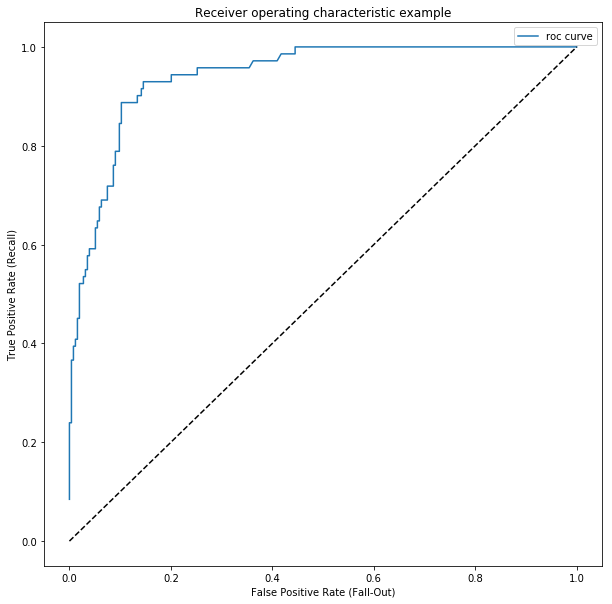

In [153]:
draw_roc()

In [154]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.9415548408561606

In [156]:
for name, importance in zip(X_train.columns, model.feature_importances_):
    print(name, importance)

single_count 0.02003350141740175
freq_billboard 0.000475684697359878
freq_genius 0.00504007075701219
freq_theSource 0.08783204762487055
freq_xxl 0.09291840845577934
twitter 0.06150809519450863
instagram 0.09855493049908827
facebook 0.026139859571887563
spotify 0.16084340673022637
soundcloud 0.16056927167345114
youtube 0.07331059104455875
genre_funk 0.0
genre_hiphop 0.0462838076514341
genre_pop 0.1036841961118603
genre_rnb 0.018334764187296432
genre_soul 0.0
rating 0.0444713643832647


In [170]:
pred = model.predict(X_test)

In [171]:
df_pred = pd.DataFrame(pred, columns=['pred'])

In [172]:
df_pred

,pred
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [173]:
y_label = y_test.copy().reset_index(drop=True)
X_test_2 = X_test_0.copy().reset_index(drop=True)

In [174]:
X_test_2['label'] = y_label

In [175]:
X_test_2['pred'] = df_pred['pred']

In [176]:
X_test_2

,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,...,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul,rating,label,pred
0,Rae Sremmurd,SremmLife,5,4,3,39,546,679723,0,3025528,...,497189,6212890,0,1,0,0,0,78.0,1,1
1,King Los,"God, Money, War",4,0,0,92,12,266309,211726,144600,...,30417,92623,0,1,0,0,0,0.0,1,0
2,Karise Eden,My Journey,1,0,0,0,0,27481,12653,105545,...,1806,13007,0,0,0,1,0,0.0,0,0
3,Lena Katina,This Is Who I Am,4,0,0,0,654,45247,104205,160482,...,1907,60886,0,0,1,0,0,0.0,0,0
4,Cyhi the Prynce,No Dope on Sundays,2,0,3,3,42,149457,161083,50686,...,22633,0,0,1,0,0,0,0.0,1,0
5,Dear Rouge,Black To Gold,4,0,0,0,1,8613,10213,10025,...,2110,0,0,0,1,0,0,0.0,0,0
6,MS MR,Secondhand Rapture,4,0,0,0,0,45239,34182,271921,...,241313,84177,0,0,1,0,0,60.0,0,0
7,Def Dee,33 and a Third,0,0,0,27,79,0,0,0,...,0,0,0,1,0,0,0,0.0,0,0
8,Sheer Mag,Need To Feel Your Love,3,0,0,15,190,0,0,16740,...,3084,0,0,0,1,0,0,0.0,0,0
9,Broiler,The Beginning,4,0,0,0,1053,3970,26789,0,...,10121,50088,0,0,1,0,0,0.0,0,0


In [177]:
tmp = X_test_2[X_test_2['label'] != X_test_2['pred']]

In [178]:
tmp

,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,...,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul,rating,label,pred
1,King Los,"God, Money, War",4,0,0,92,12,266309,211726,144600,...,30417,92623,0,1,0,0,0,0.0,1,0
4,Cyhi the Prynce,No Dope on Sundays,2,0,3,3,42,149457,161083,50686,...,22633,0,0,1,0,0,0,0.0,1,0
20,Kilo Kish,Reflections in Real Time,0,0,0,0,10,40682,418,66593,...,56514,9371,0,0,0,1,0,0.0,1,0
21,Ben Haenow,Ben Haenow,2,0,0,0,0,0,324941,418269,...,0,94090,0,0,1,0,0,0.0,1,0
22,Brockhampton,All-American Trash,0,0,0,0,9,257665,445507,80464,...,39802,302009,0,1,0,0,0,0.0,1,0
25,Hozier,Hozier,7,1,0,10,11,680205,876781,1496821,...,106770,1823423,0,0,0,1,0,79.0,0,1
26,James Arthur,James Arthur,4,0,0,20,11,2341398,627946,2098320,...,0,7430,0,0,0,1,0,58.0,1,0
47,SoMo,SoMo,5,1,12,15,2,276534,254519,320699,...,287396,1562737,0,0,0,1,0,0.0,1,0
51,LANY,LANY,6,0,2,22,0,248133,355372,340390,...,48443,338329,0,0,1,0,0,66.0,1,0
55,Elle Varner,Perfectly Imperfect,4,0,0,3,0,166057,586411,1021181,...,19495,115089,0,0,0,1,0,0.0,1,0


In [179]:
tmp.to_csv("incorrect_prediction.csv")

In [78]:
tmp[tmp['label'] == 1]

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul,rating,label,pred
204,5,4,3,39,546,679723,0,3025528,3084033,497189,6212890,0,1,0,0,0,78.0,1,0.0
183,4,0,0,92,12,266309,211726,144600,41987,30417,92623,0,1,0,0,0,0.0,1,0.0
272,2,0,3,3,42,149457,161083,50686,53054,22633,0,0,1,0,0,0,0.0,1,0.0
27,0,0,0,1,5,157222,147326,207900,78987,55449,8104,0,1,0,0,0,0.0,1,0.0
316,4,0,0,2,40,1373052,3742923,4814567,2616368,835859,6822662,0,1,0,0,0,62.0,1,0.0
442,0,0,0,0,10,40682,418,66593,49610,56514,9371,0,0,0,1,0,0.0,1,NaN
918,2,0,0,0,0,0,324941,418269,58896,0,94090,0,0,1,0,0,0.0,1,NaN
214,0,0,0,0,9,257665,445507,80464,351839,39802,302009,0,1,0,0,0,0.0,1,0.0
367,4,0,0,20,11,2341398,627946,2098320,1819118,0,7430,0,0,0,1,0,58.0,1,NaN
403,3,2,0,75,267,1488948,2302339,228795,1264317,1260549,625029,0,0,0,1,0,46.0,1,NaN
